In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
IceCream = pd.read_csv('/content/drive/MyDrive/ads_dataset/IceCream.csv')

In [80]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [81]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


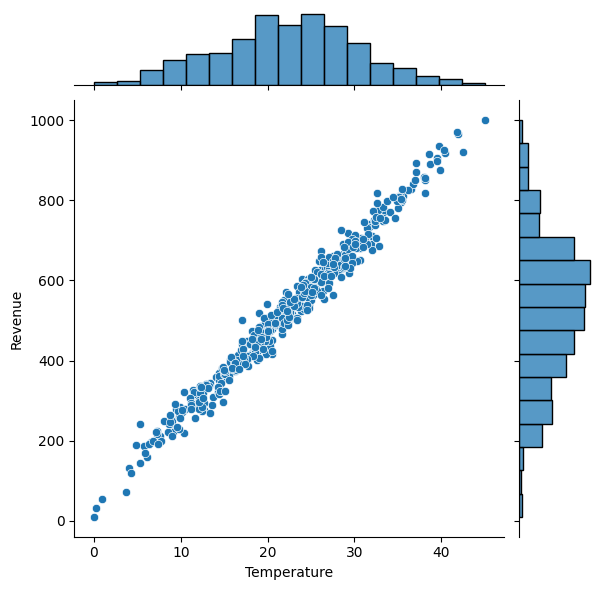

In [82]:
sns.jointplot(x = 'Temperature' , y = 'Revenue', data = IceCream)

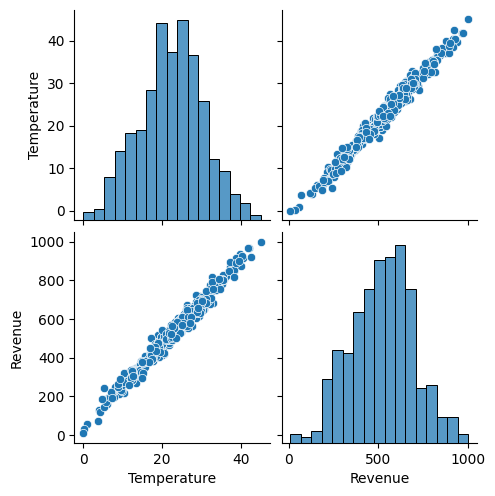

In [83]:
sns.pairplot(IceCream)

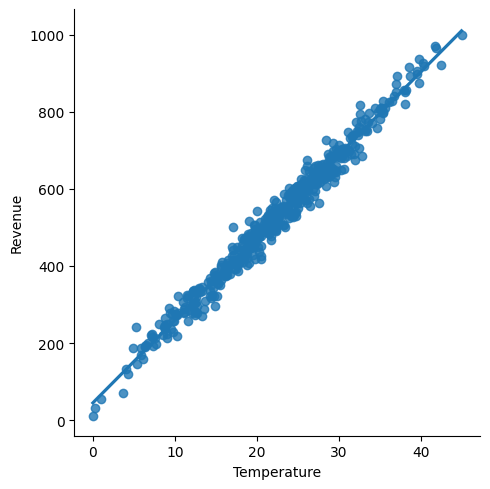

In [84]:
sns.lmplot(x = 'Temperature',y='Revenue',data = IceCream)

In [85]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [88]:
X_train.shape

(400, 1)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regressor = LinearRegression(fit_intercept = True)

In [91]:
regressor.fit(X_train,y_train)

LinearRegression()

In [92]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient(b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.5]
Linear Model Coefficient(b):  43.59313455957948


In [93]:
y_pred = regressor.predict(X_test)

Multiple Linear Regression

In [94]:
StartUp = pd.read_csv('/content/drive/MyDrive/ads_dataset/50_Startups.csv')

In [95]:
x = StartUp.iloc[:,:-1].values
y = StartUp.iloc[:,-1].values

In [96]:
StartUp.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers = [('encoding',OneHotEncoder(),[3])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [99]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred = lr.predict(X_test)

In [101]:
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [102]:
from sklearn.metrics import r2_score
r2_score(y_test,lr.predict(X_test))

0.9347068473282546

In [103]:
ps =pd.read_csv('/content/drive/MyDrive/ads_dataset/PositionSalaries_Data.csv')

In [104]:
ps

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [105]:
X = ps.iloc[:,1:-1].values
y = ps.iloc[:,-1].values

In [106]:
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

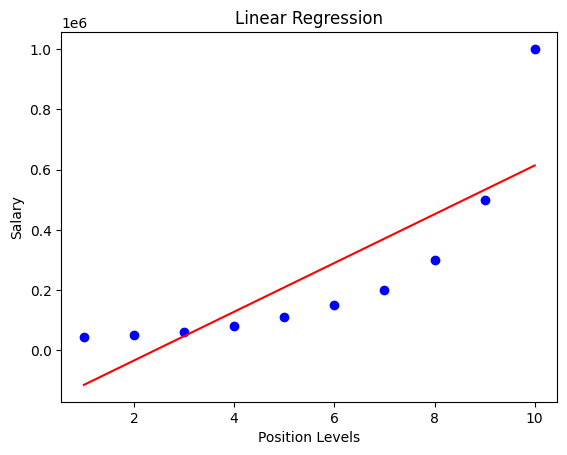

In [107]:
plt.scatter(X,y,color="blue")
plt.plot(X,regressor.predict(X),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show

In [108]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

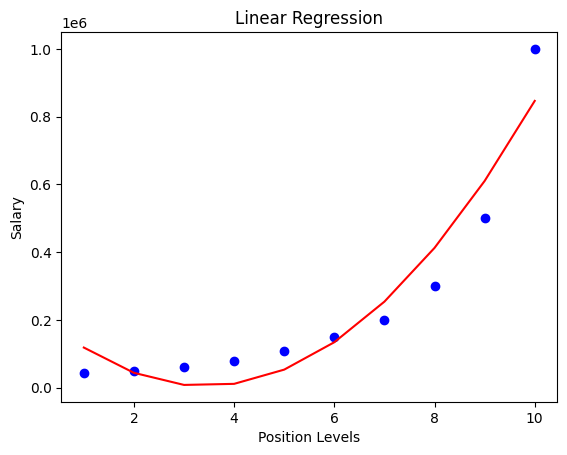

In [109]:
plt.scatter(X,y,color="blue")
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regs = PolynomialFeatures(degree = 3)
X_polyn = poly_regs.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_polyn, y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

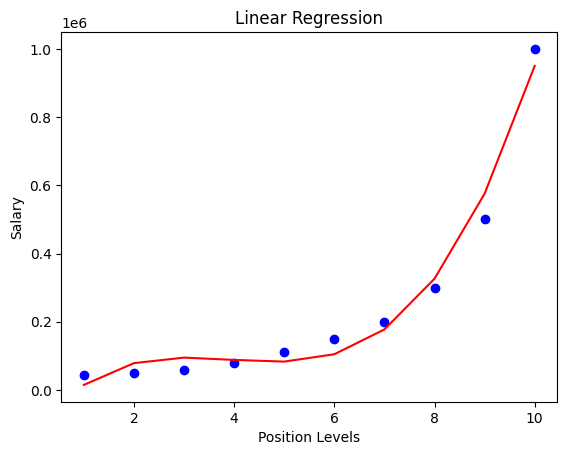

In [111]:
plt.scatter(X,y,color="blue")
plt.plot(X,lin_reg.predict(poly_regs.fit_transform(X)),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show

In [112]:
poly_pred = lin_reg.predict(poly_regs.fit_transform([[8]]))
print(poly_pred)

[326312.35]


In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_regss = PolynomialFeatures(degree = 4)
X_polya = poly_regss.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_polya, y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

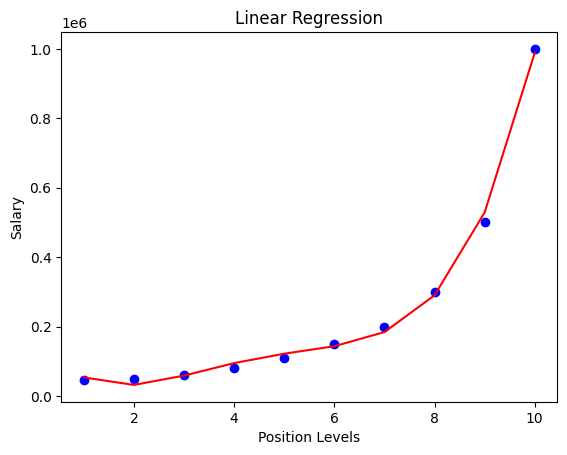

In [114]:
plt.scatter(X,y,color="blue")
plt.plot(X,lin_reg.predict(poly_regss.fit_transform(X)),color="red")
plt.title("Linear Regression")
plt.xlabel("Position Levels")
plt.ylabel("Salary")
plt.show

**Conclusion**
Simple Linear regression is using two variables one independent and one dependent, On the IceCream data we performed simple linear regression

*Multiple Linear Regression* It uses one dependent and multiple independent variables we used the dataset named Startups.

*Polynomial Regression* - The difference between poly and linear is that in polynomial the line is not linear it is curvilinear in nature

Parameters used R2 score, Mean absolute error, mean squared error and root squared error.